# Study Case

Data Background Bike sharing systems adalah generasi baru dari sistem penyewaan sepeda tradisional di mana seluruh proses mulai dari keanggotaan, persewaan, dan pengembalian menjadi otomatis. Melalui sistem ini, pengguna dapat dengan mudah menyewa sepeda dari posisi tertentu dan kembali ke posisi lain. Saat ini, ada lebih dari 500 program berbagi sepeda di seluruh dunia yang terdiri dari lebih dari 500 ribu sepeda. Saat ini, ada minat besar dalam sistem ini karena peran penting mereka dalam masalah lalu lintas, lingkungan dan kesehatan.

Dataset characteristics Dataset ini berisi kalkulasi per-jam dan harian sepeda sewaan antara tahun 2011 dan 2012 di sistem bikeshare di Washington, DC dengan informasi cuaca dan musim yang sesuai.

Dataset day.csv dan hour.csv memiliki feature/variable yang hampir sama. perbedaannya hanya terletak pada fetaure/variable hr yang hanya ada pada dataset hour.csv

1. instant : index data
2. dteday : Taggal
3. season : Musim
    - 1 = Musim Semi
    - 2 = Musim Panas
    - 3 = Musim Gugur
    - 4 = Musim Dingin
4. yr : Tahun
5. mnth : Bulan
6. holiday : hari libur
7. weekday : hari dalam seminggu
8. workingday : jika weekend maka bernilai 0, dan jika workingday bernilai 1
9. weathersit : Kondisi cuaca
    - 1 = Cerah, Sedikit berawan, Sebagian berawan
    - 2 = Kabut + Mendung, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut
    - 3 = Salju Ringan, Hujan Ringan + Badai Petir + Awan Tersebar, Hujan Ringan + Awan Tersebar
    - 4 = Hujan deras + Palet Es + Badai Petir + Kabut, Salju + Kabut
10. temp : temperatur dalam celsius yang sudah dinormalisasi
11. atemp : temperatur yang terasa dan sudah dinormalisasi
12. hum : kelembaban yang sudah dinormalisasi
13. windspeed : kecepatan angin
14. casual : jumlah penyewa sepeda casual
15. registered : jumlah penyewa sepeda terdaftar
16. cnt : jumlah penyewa sepeda casual dan terdaftar

# Problem Bagaimana cara pengelola sistem bikeshare mengatur jumlah sepeda yang siap pakai agar dapat memaksimalkan profit?

## Terlebih dahulu data dibaca

In [11]:
data_day = pd.read_csv("bike-sharing-dataset/day.csv")
data_hour = pd.read_csv("bike-sharing-dataset/hour.csv")

&nbsp;

# DATASET 1 - Relatif terhadap hari

#### Melihat informasi tentang dataframe day

In [12]:
data_day.info()
data_day.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Menampilkan data hour

In [47]:
data_day.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Memeriksa apakah terdapat nilai null pada dataframe day

In [48]:
data_day.isnull().any()

instant       False
dteday        False
season        False
yr            False
mnth          False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

#### Memeriksa apakah ada data duplikat pada dataframe day

In [50]:
if data_day.duplicated().any():
    print("Terdapat data yang double")
else:
    print("Tidak ada data yang kembar")

Tidak ada data yang kembar


#### Mengubah format dari object menjadi pandas datetime

In [51]:
data_day['dteday'] = pd.to_datetime(data_hour['dteday'])
data_day.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-01,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-01,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-01,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Memeriksa kembali dataframe day, apakah penggantian tipe data berhasil

In [52]:
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Day-Borrower Relationship

In [53]:
wd_group = data_day.groupby('weekday').sum()

### Sorted by count

In [54]:
wd_group_sorted = wd_group.sort_values('cnt')
wd_group_sorted

,instant,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
weekday,,,,,,,,,,,,,,
0,38430,261,53,680,0,0,137,50.780899,48.855211,65.904171,19.795638,140521,303506,444027
1,38535,262,53,682,15,90,146,51.812183,49.829085,66.945536,20.022517,70784,384719,455503
2,37908,262,52,674,1,103,150,52.445326,50.267030,66.750254,19.949832,57843,411266,469109
3,38012,260,52,677,1,103,151,52.481064,50.087487,67.118276,19.524592,57319,415729,473048
6,38325,260,52,688,0,0,147,50.613988,48.517498,65.053826,20.641691,153852,323955,477807
4,38116,261,52,681,2,102,144,52.451518,50.200829,63.387899,19.926720,61460,423935,485395
5,38220,259,52,684,2,102,145,51.541302,48.995626,63.830598,19.384430,78238,409552,487790


#### Informasi berdasarkan sortir
Dapat terlihat pada weekday hari ke-5 (berdasarkan zero-indexing, maka ini adalah hari Sabtu), jumlah peminjam
sepeda adalah yang terbanyak. Dengan rincian:

###### Jumlah peminjam terbanyak :

In [55]:
wd_group_sorted['cnt'].max()

487790

###### Jumlah peminjam tersedikit :

In [56]:
wd_group_sorted['cnt'].min()

444027

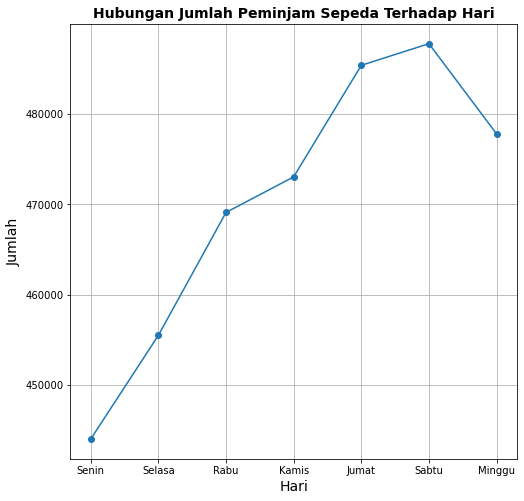

In [57]:
# Set to render on jupyter notebook
%matplotlib inline

days = ["Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu", "Minggu"]

title_opts = {
    "fontsize" : "14",
    "fontweight" : "bold"
}


plt.figure(1, figsize=(8,8))
plt.plot(days, wd_group['cnt'], marker="o")
plt.title("Hubungan Jumlah Peminjam Sepeda Terhadap Hari", fontdict=title_opts)
plt.xlabel("Hari", fontsize=14)
plt.ylabel("Jumlah", fontsize=14)
plt.grid()

plt.show()

&nbsp;

## Weather-Borrower Relationship

#### Data grouping

In [62]:
# data_day.head(5)
weather_group = data_day.groupby("weathersit").sum()
weather_group.head(5)

weather_labels = [
    "Cerah, Sedikit berawan, Sebagian berawan",
    "Kabut + Mendung, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut",
    "Salju Ringan, Hujan Ringan + Badai Petir + Awan Tersebar, Hujan Ringan + Awan Tersebar",
    "Hujan deras + Palet Es + Badai Petir + Kabut, Salju + Kabut",
]

#### Sort by count

In [64]:
weather_group_sorted = weather_group.sort_values('cnt')
weather_group_sorted

,instant,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
weathersit,,,,,,,,,,,,,,
3,7060,62,6,170,0,67,16,9.102243,8.674344,17.826322,5.110049,3895,33974,37869
2,89850,606,123,1604,6,757,177,116.180341,111.858395,179.294035,46.048407,169776,827082,996858
1,170636,1157,237,2992,15,1367,307,236.843696,226.220027,261.870203,88.086965,446346,1811606,2257952


##### Informasi berdasarkan hasil sorting
Jumlah peminjam terbanyak terdapat pada musim dengan index 1, yaitu:

In [71]:
print(weather_labels[0], end=":\n")
print(weather_group['cnt'].max(), "peminjam")

Cerah, Sedikit berawan, Sebagian berawan:
2257952 peminjam


Sedangkan jumlah peminjam tersedikit terdapat pada musim dengan index 3, yaitu:

In [74]:
print(weather_labels[2], end=":\n")
print(weather_group['cnt'].min(), "peminjam")

Salju Ringan, Hujan Ringan + Badai Petir + Awan Tersebar, Hujan Ringan + Awan Tersebar:
37869 peminjam


### Visualisasi Data

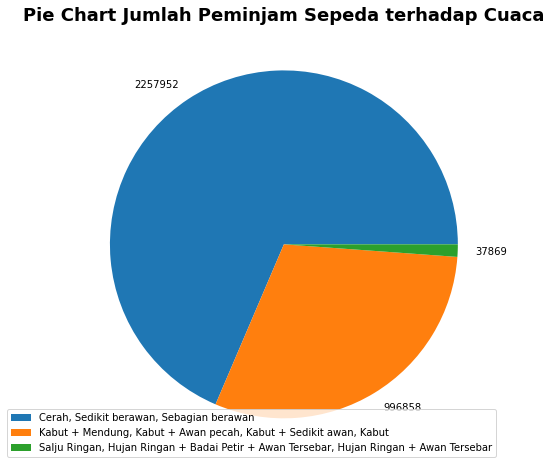

In [84]:
weather_labels = [
    "Cerah, Sedikit berawan, Sebagian berawan",
    "Kabut + Mendung, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut",
    "Salju Ringan, Hujan Ringan + Badai Petir + Awan Tersebar, Hujan Ringan + Awan Tersebar",
]

title_opts = {
    "fontsize": 18,
    "fontweight": "bold"
}

plt.figure(1, figsize=(8,8))
plt.pie(weather_group['cnt'], labels=weather_group['cnt'])
plt.title("Pie Chart Jumlah Peminjam Sepeda terhadap Cuaca", title_opts)
plt.legend(weather_labels, loc="lower right")
plt.show()

&nbsp;

## Hour-Borrower Relationship

In [95]:
hour_group = data_hour.groupby('hr').sum()
hour_group.head(5)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
hr,,,,,,,,,,,,,,,
0,6299998,1815,365,4744,21,2181,496,1015,339.34,327.5020,501.68,117.4366,7375,31755,39130
1,6278992,1808,364,4725,21,2178,494,1014,332.58,320.9413,509.85,114.8692,4709,19455,24164
2,6253775,1796,363,4696,21,2165,487,1008,325.02,314.0169,512.53,110.4813,3412,12940,16352
3,6147304,1770,355,4632,18,2110,470,993,315.82,305.5619,508.66,105.1976,1893,6281,8174
4,6198111,1779,360,4645,20,2099,470,994,311.30,301.4870,517.43,108.6015,874,3554,4428


#### Sorting by count

In [97]:
hour_group_sorted = hour_group.sort_values('cnt')
hour_group_sorted

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
hr,,,,,,,,,,,,,,,
4,6198111,1779,360,4645,20,2099,470,994,311.30,301.4870,517.43,108.6015,874,3554,4428
3,6147304,1770,355,4632,18,2110,470,993,315.82,305.5619,508.66,105.1976,1893,6281,8174
5,6279702,1802,364,4719,21,2168,495,1020,312.70,303.3953,532.68,107.7955,1012,13249,14261
2,6253775,1796,363,4696,21,2165,487,1008,325.02,314.0169,512.53,110.4813,3412,12940,16352
1,6278992,1808,364,4725,21,2178,494,1014,332.58,320.9413,509.85,114.8692,4709,19455,24164
0,6299998,1815,365,4744,21,2181,496,1015,339.34,327.5020,501.68,117.4366,7375,31755,39130
6,6288923,1811,364,4735,21,2182,496,1052,313.54,304.0473,539.53,114.3484,3017,52115,55132
23,6318228,1817,365,4747,21,2181,498,1031,345.82,333.4869,490.14,119.9760,11065,52876,63941
22,6317500,1817,365,4747,21,2181,498,1002,352.72,339.6375,475.49,127.1382,16200,79412,95612


#### Analisa
Dari hasil sorting, dapat terlihat bahwa 3 waktu dimana terdapat peminjam terbanyak adalah pada pukul (24-hour format):
1. 17.00
2. 18.00
3. 08.00  

dengan rincian jumlah peminjam:

In [103]:
hour_group_sorted['cnt'].tail(3)

hr
8     261001
18    309772
17    336860
Name: cnt, dtype: int64

Untuk jumlah peminjam sepeda tersedikit, terdapat pada 3 waktu berikut (24-hour format):
1. 04.00
2. 03.00
3. 05.00

dengan rincian sebagai berikut:

In [105]:
hour_group_sorted['cnt'].head(3)

hr
4     4428
3     8174
5    14261
Name: cnt, dtype: int64

### Data Visualization

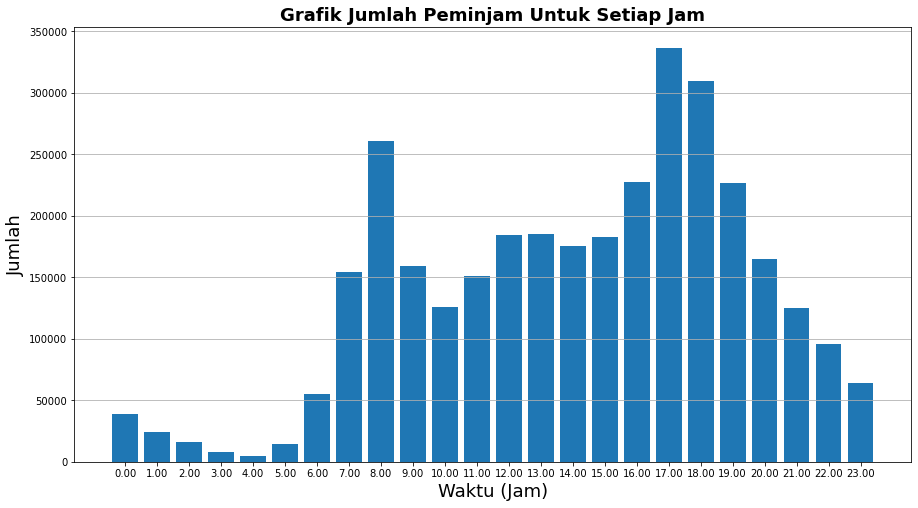

In [127]:
hours = [f"{hour}.00" for hour in range(0, 24)]

title_opts = {
    "fontweight" : "bold",
    "fontsize" : 18
}

label_opts = {
    "fontsize" : 18
}

plt.figure(1, figsize=(15,8))
plt.bar(hours, hour_group['cnt'])
plt.title("Grafik Jumlah Peminjam Untuk Setiap Jam", title_opts)
plt.xlabel("Waktu (Jam)", fontdict=label_opts)
plt.ylabel("Jumlah", fontdict=label_opts)
plt.grid(axis='y')
plt.show()

# Kesimpulan

Dengan demikian, berdasarkan analisa diatas, dapat diambil beberapa poin kesimpulan berikut:

1. Jumlah penyewa sepeda terbanyak adalah pada **hari Sabtu**, ATAU
2. Jumlah penyewa sepeda terbanyak adalah pada cuaca yang: **Cerah, Sedikit berawan, Sebagian berawan**, ATAU
3. Jumlah penyewa sepeda terbanyak adalah pada waktu sore hari (**pukul 17.00 - 18.00**)

Jumlah penyewa sepeda tersebut sudah termasuk jumlah untuk yang _casual_ dan _registered_ (premium)

## Referensi

1. Sistem bike-share di Washington DC